<a href="https://colab.research.google.com/github/FirasBDarwish/Localization-System/blob/main/Localization_System_(Data_Upload_and_Pre_Processing).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Localization-System
Developed as part of Research Assistantship work with the Laboratory of Computer-Human Intelligence headed by Professor Tuka Alhanai.

We are developing a localization (position and rotation tracking) system for use in experimental set-ups and to generate point clouds of fixed 3D euclidean space.

## Aim of Project
To employ a streamlined method for object localization and detection in 3D space using a sensor-based system. Through tracking the absolute position of an object, this system can map various features of that object’s movement to specialized settings (3D position to robot motion and planning). We hope to provide a proof-of-concept for the selected method against other researched set-ups, as well as use the system to collect, process, and analyze different motion-based, 3D data.

## Code Overview:

Input: *CLEANED* input data (see github repo [readme](https://colab.research.google.com/drive/1CENTF7Rvn1QkXr7cgVbq6sg5h8lFB3dq#scrollTo=-_1ZCtPGvDd8&line=11&uniqifier=1) for more instruction)

Output: Pandas Dataframe containing x, y, z, and rotation values. It also outputs a 2D projection on X-Z plane of the points and a 3D point cloud.

Based on how you calibrate your HMD and Vive Pro 2 when prompted by SteamVR, you will follow the following coordinate frame (see images below). However, when comparing different runtimes, you will have to use the github repo's next step (standardizing coordinate frames) to conduct an apples-to-apples comparison.

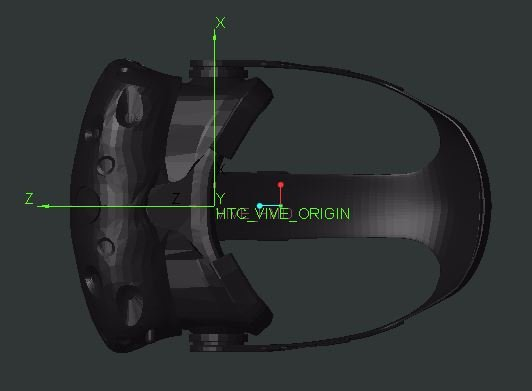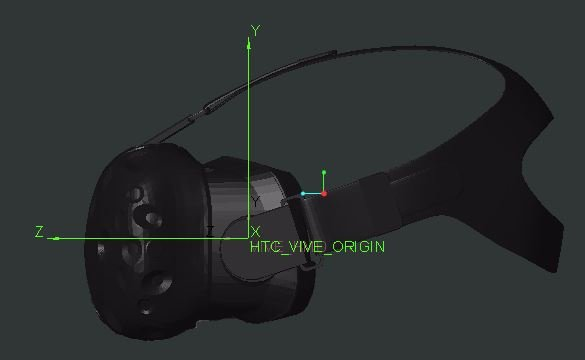

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [5]:
def pre_process(path_to_file, filtering_rate):
  file = open(path_to_file, 'r')

  df = pd.DataFrame();

  iter = 0
  time = 0
  for line in file:
      if (not iter%filtering_rate):
        # Split the string by commas
        values = line.split(',')
        # df.loc[iter, "time"] = time; #developing mechanism for time and distance metrics

        # Extract the values using indexing and stripping whitespace
        df.loc[iter,"x"] = float(values[2].split('=')[1].strip())
        df.loc[iter,"y"] = float(values[3].split('=')[1].strip())
        df.loc[iter, "z"] = float(values[4].split('=')[1].strip())
        df.loc[iter, "qw"] = float(values[5].split('=')[1].strip())
        df.loc[iter,"qx"] = float(values[6].split('=')[1].strip())
        df.loc[iter,"qy"] = float(values[7].split('=')[1].strip())
        df.loc[iter,"qz"] = float(values[8].split('=')[1].strip())

        # time=time+(1/120);
      iter=iter+1;

  file.close()

  #plotting projection on x-z (flat) plane
  fig = plt.figure()
  ax = plt.axis()

  plt.scatter(df["x"],df["z"], color = "black")
  plt.xlabel('x')
  plt.ylabel('z')

  # displaying the title
  plt.title("2D Projection of Vive Pro 2 Headset Position on X-Z Axes")

  #plot 3D scatter plot (point cloud)
  fig = plt.figure()
  ax = fig.add_subplot(111, projection='3d')

  x =df["x"]
  y =df["z"]
  z =df["y"]

  ax.scatter(x, y, z, c='r', marker='o')

  ax.set_xlabel('x')
  ax.set_ylabel('z')
  ax.set_zlabel('y')

  plt.show()

  return df

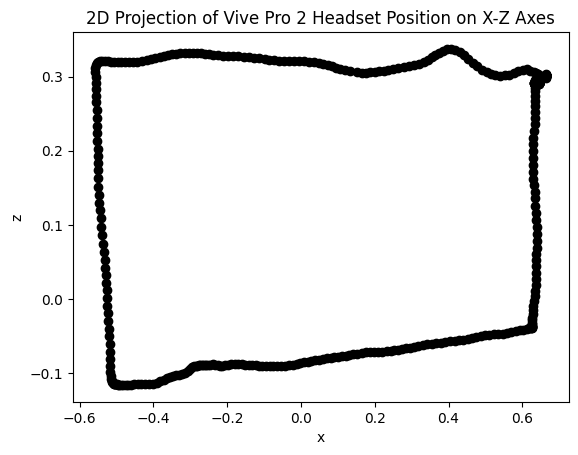

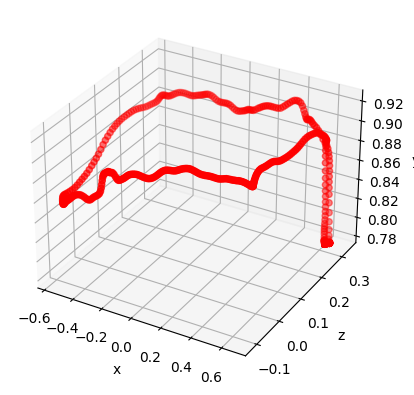

In [7]:
path_to_file = "/content/drive/MyDrive/LabWork (Comp-Human Intelligence)/Output-1.txt"
filter_rate = 400

pre_process(path_to_file, filter_rate)